In [1]:
from __future__ import division, print_function, absolute_import
import logging
import time
import tensorflow as tf
import os
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
from config import pathDict
from conv_net.train import Train
from conv_net.test import Test
from data_transformation.data_prep import get_intersecting_images_pin, DumpBatches
from plot import Plot
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


which_net = 'resnet'
batch_prepare = True
train = True
test = True

INPUT the RUN NAME: Options : ("A new run name" or "Any Previous Run Name"
 WHICH_RUN = new_test
INPUT: Image-type OPTIONS: (assessor, assessor_code, aerial, overlayed, aerial_cropped, streetside and ensemble 
 IMAGE_TYPE = overlayed


## PREPARE/DUMP BATCHES:

In [3]:
start_time = time.time()

max_batches = None

if batch_prepare:
    start_time = time.time()
    
    cmn_land_pins, cmn_house_pins = get_intersecting_images_pin(is_assessor=False, is_aerial=False,
                                                                is_streetside=False, is_overlayed=True,
                                                                is_aerial_cropped=False, equal_proportion=True)
    print(len(cmn_land_pins), len(cmn_house_pins))
    
    tr_batch_size = 128
    ts_batch_size = (len(cmn_land_pins) + len(cmn_house_pins)) // 10
    cv_batch_size = (len(cmn_land_pins) + len(cmn_house_pins)) // 10
    
    params = dict(
            image_type='aerial_cropped',
            img_in_shape=[400, 400, 3],
            img_out_shape=[224, 224, 3],
            img_resize_shape=[128, 128, 3],
            img_crop_shape=[128, 128, 3],
            tr_batch_size = tr_batch_size,
            cv_batch_size = cv_batch_size,
            ts_batch_size = ts_batch_size,
            enable_rotation=True,
            shuffle_seed=881,
            get_stats=True,
            max_batches=max_batches)
    
    obj_cb = DumpBatches(params)
    obj_cb.dumpStratifiedBatches_balanced_class(cmn_land_pins, cmn_house_pins, is_cvalid_test=False)

print ('--------------- %s seconds ------------------'%(time.time() - start_time))


1084 1084
2168 2168 2168 2168 2168=== 15
--------------- 37.91923785209656 seconds ------------------


## TEST MODEL:

In [4]:
which_data = 'test'
tsoj = Test(params=dict(pprocessor_inp_img_shape=[224,224,3],
                        pprocessor_inp_crop_shape=[],
                        model_inp_img_shape=[224, 224, 3]),
                    device_type = 'gpu',
                    which_net='resnet')
fnl_tst_metric_stack = tsoj.run(use_checkpoint_for_run='sam_new',
                                use_checkpoint_for_imageType='overlayed',
                                optional_batch_name=None,
                                which_checkpoint='all',
                                which_data=which_data,
                                dump_stats=True)

Reading from Checkpoint_path:  C:\Users\newline\Documents\ImageClassification\data\checkpoints\sam_new\overlayed\resnet
Test Graphs: RESNET
Learning Rate: Initial:  0.0005
Batch path C:\Users\newline\Documents\ImageClassification\data\batch_data\new_test\overlayed, batch_names: ['batch_0', 'batch_1', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_14', 'batch_15', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9']
Test Graphs: RESNET
Learning Rate: Initial:  0.0005
Batch path C:\Users\newline\Documents\ImageClassification\data\batch_data\new_test\overlayed, batch_names: ['batch_0', 'batch_1', 'batch_10', 'batch_11', 'batch_12', 'batch_13', 'batch_14', 'batch_15', 'batch_2', 'batch_3', 'batch_4', 'batch_5', 'batch_6', 'batch_7', 'batch_8', 'batch_9']
Test Graphs: RESNET
Learning Rate: Initial:  0.0005
Batch path C:\Users\newline\Documents\ImageClassification\data\batch_data\new_test\overlayed, batch_names: ['batch_0', 'batch_1', 'batch_10', 'b

## GET PREDICTIONS

In [5]:
prediction_outcomes_path = os.path.join(pathDict['statistics_path'], 'prediction_stats', 'test_pred_outcomes.csv')
prediction_metrics_path = os.path.join(pathDict['statistics_path'], 'prediction_stats', 'test_pred_metrics.csv')
prediction_outcomes = pd.read_csv(prediction_outcomes_path)
prediction_metrics = pd.read_csv(prediction_metrics_path)
pd.concat([prediction_metrics.head(), prediction_metrics.tail()])

,checkpoint,dataset_type,test_loss,test_acc,test_precsion,test_recall
0,epoch_14_batch_79,batch_0,0.215,0.938,0.952,0.922
1,epoch_14_batch_79,batch_1,0.332,0.898,0.905,0.891
2,epoch_14_batch_79,batch_10,0.460,0.891,0.879,0.906
3,epoch_14_batch_79,batch_11,0.247,0.930,0.937,0.922
4,epoch_14_batch_79,batch_12,0.455,0.883,0.930,0.828
75,epoch_14_batch_116,batch_5,0.303,0.898,0.892,0.906
76,epoch_14_batch_116,batch_6,0.518,0.883,0.877,0.891
77,epoch_14_batch_116,batch_7,0.394,0.867,0.885,0.844
78,epoch_14_batch_116,batch_8,0.287,0.906,0.919,0.891
79,epoch_14_batch_116,batch_9,0.268,0.922,0.935,0.906


In [6]:
np.unique(prediction_metrics["checkpoint"])

array(['epoch_14_batch_109', 'epoch_14_batch_116', 'epoch_14_batch_79',
       'epoch_14_batch_89', 'epoch_14_batch_99'], dtype=object)

In [7]:
prediction_metrics[prediction_metrics['checkpoint'] == 'epoch_14_batch_116']

,checkpoint,dataset_type,test_loss,test_acc,test_precsion,test_recall
64,epoch_14_batch_116,batch_0,0.205,0.938,0.952,0.922
65,epoch_14_batch_116,batch_1,0.331,0.898,0.905,0.891
66,epoch_14_batch_116,batch_10,0.453,0.898,0.881,0.922
67,epoch_14_batch_116,batch_11,0.250,0.930,0.937,0.922
68,epoch_14_batch_116,batch_12,0.437,0.867,0.912,0.812
69,epoch_14_batch_116,batch_13,0.306,0.906,0.882,0.938
70,epoch_14_batch_116,batch_14,0.291,0.922,0.935,0.906
71,epoch_14_batch_116,batch_15,0.229,0.931,0.915,0.952
72,epoch_14_batch_116,batch_2,0.486,0.859,0.829,0.906
73,epoch_14_batch_116,batch_3,0.300,0.930,0.951,0.906


In [8]:
from conv_net.utils import Score

def graph_for_checkpoint(checlpoint_num):
    predictions = prediction_outcomes[prediction_outcomes['checkpoint'] == checlpoint_num]
    accuracy = Score().accuracy(y_true=predictions["true_label"], y_pred=predictions["pred_label"])
    precision = Score().precision(y_true=predictions["true_label"], y_pred=predictions["pred_label"], reverse=True)
    recall = Score().recall(y_true=predictions["true_label"], y_pred=predictions["pred_label"], reverse=True)
    auc = Score().auc(y_true=predictions["true_label"], y_pred=predictions["pred_label"])
    print (accuracy, precision, recall, auc)

    # GET Precision, Recall and Accuracy for several Theshold
    acc_arr, prscn_arr, rcall_arr, thresholds = Score().prec_rec_acc_for_thresh(
        y_true=np.array(predictions["true_label"]), y_pred=np.array(predictions["pred_label"]), 
        y_pred_prob=np.array(predictions["pred_prob"]), num_thres=100, reverse=True
    )
    
    return acc_arr, prscn_arr, rcall_arr, thresholds

In [9]:
checkpoint_arr = ['epoch_29_batch_109', 'epoch_29_batch_116', 'epoch_29_batch_89', 'epoch_29_batch_99', 
                  'epoch_30_batch_9', 'epoch_7_batch_109', 'epoch_7_batch_116', 'epoch_7_batch_89', 
                  'epoch_7_batch_99']

## PLOTS

C:\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

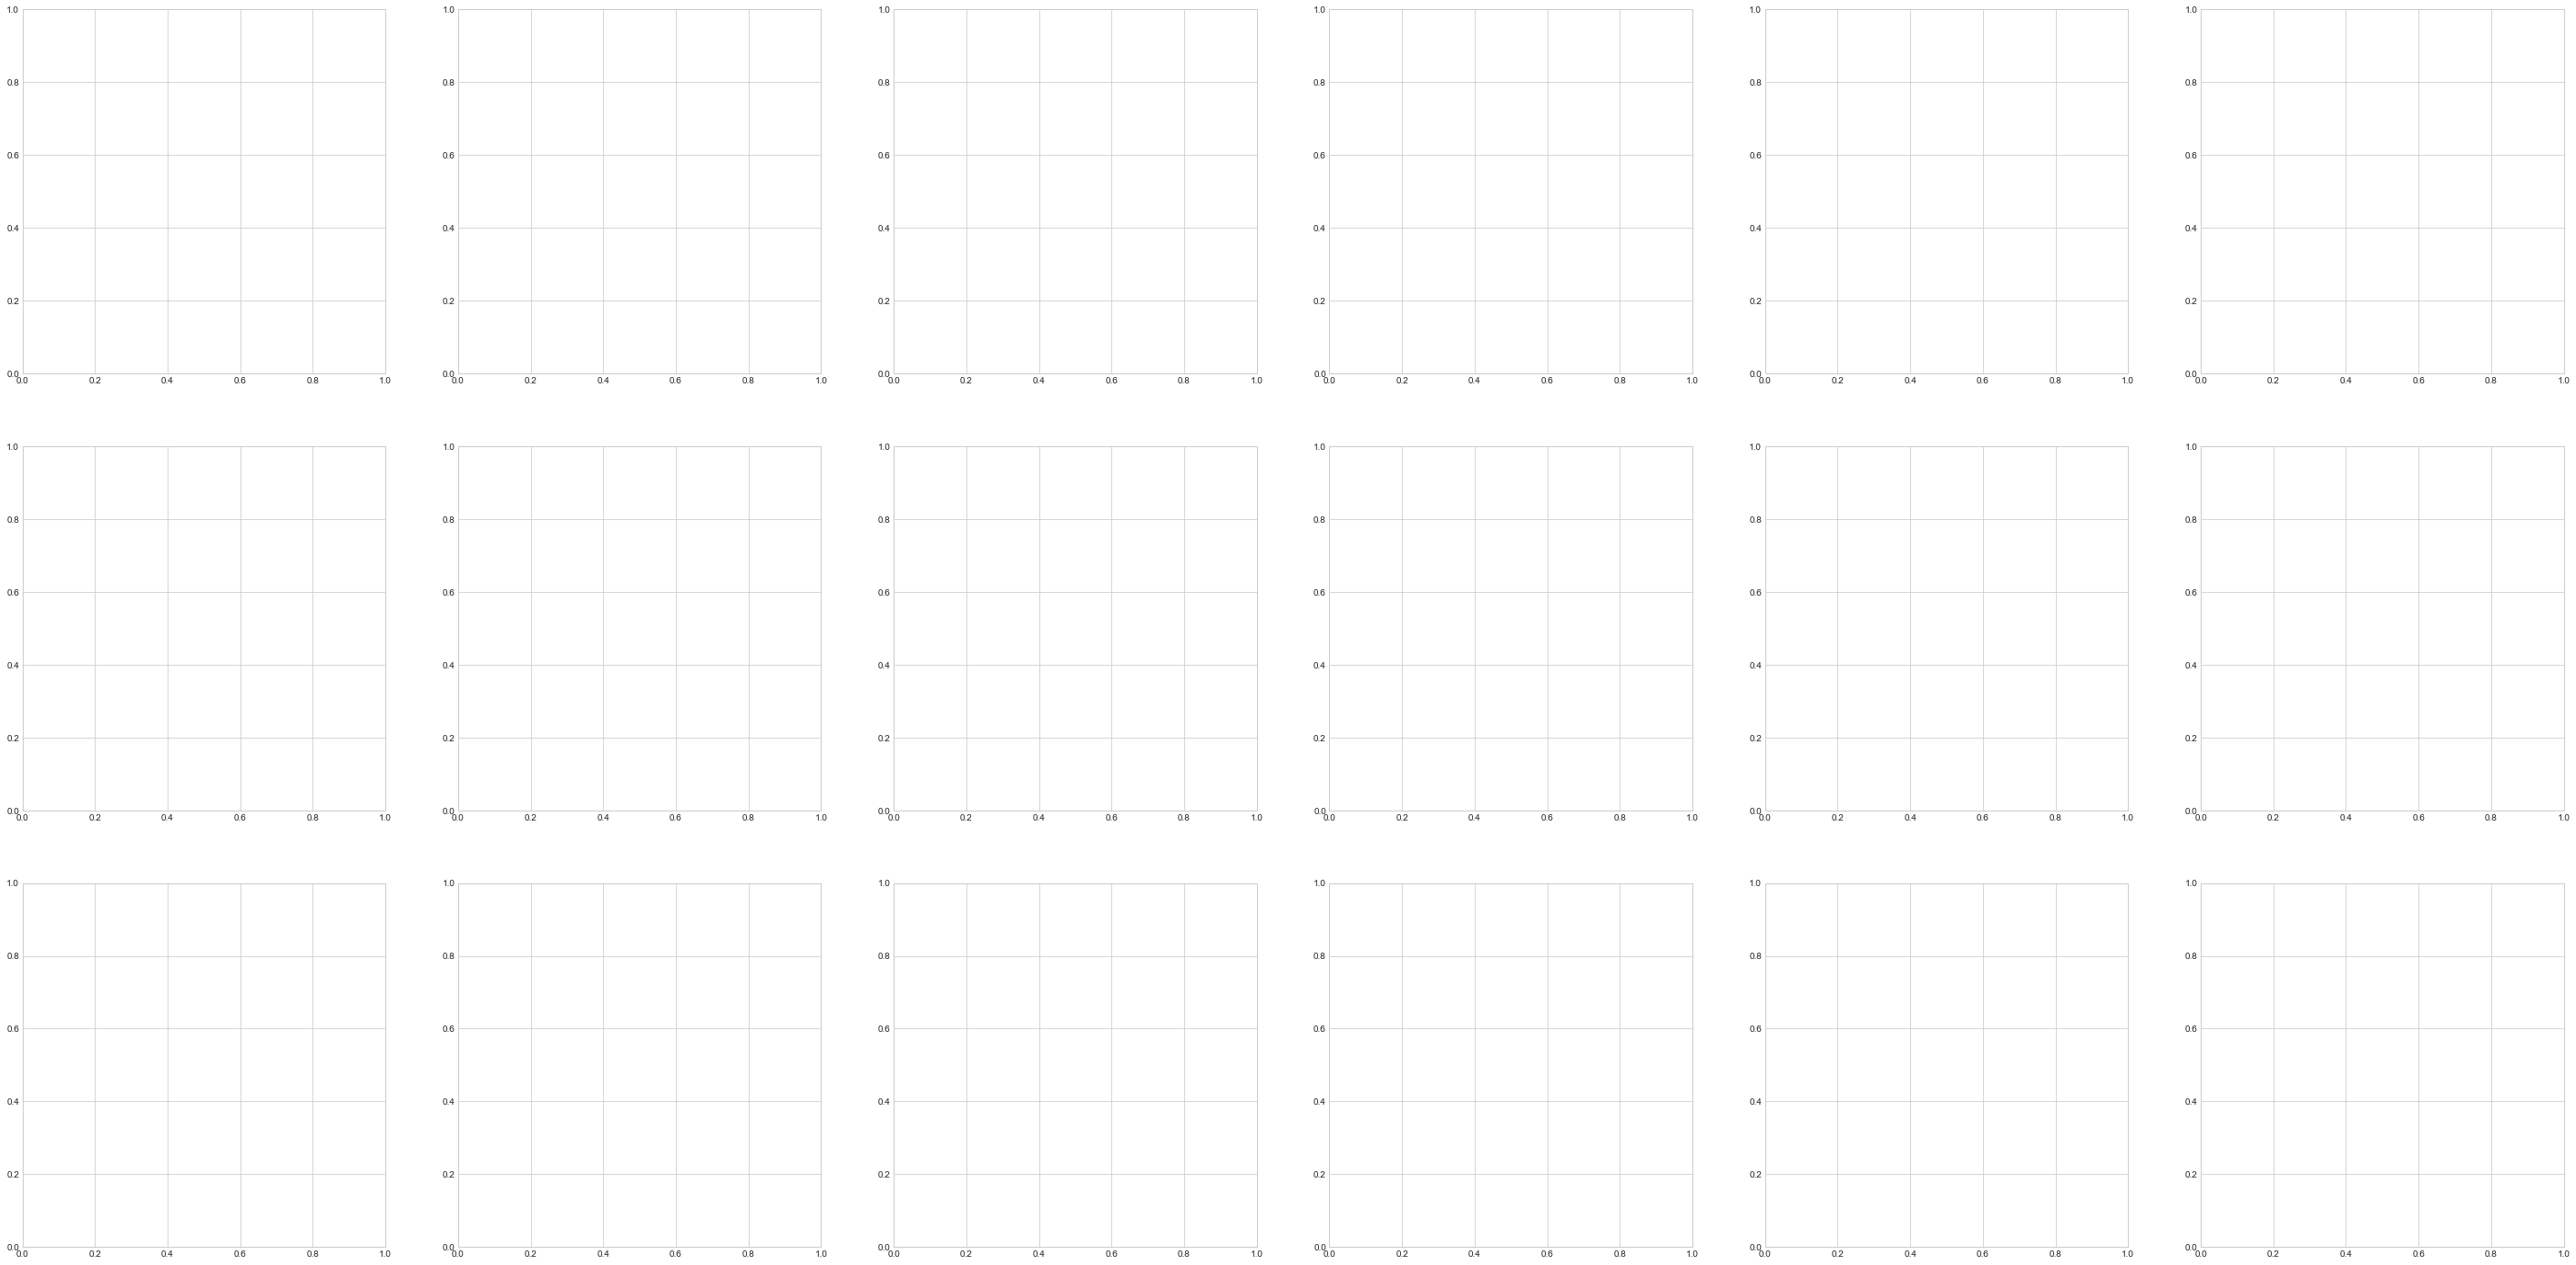

In [10]:
from plot import Plot
obj_plt = Plot(3,6, (50,25))

for chk in checkpoint_arr:
    acc_arr, prscn_arr, rcall_arr, thresholds = graph_for_checkpoint(chk)
    obj_plt.vizualize(data=predictions[["true_label", "pred_label"]], 
                     colX="true_label", colY="pred_label", 
                     label_col=None, viz_type="pr_curve", 
                     params={"title":"Precision Recall Curve", 'reverse':True})
    obj_plt.vizualize(data=pd.DataFrame({'threshold': thresholds, 'accuracy':acc_arr, 'precision':prscn_arr, 'recall':rcall_arr}), 
                     colX='threshold', colY=None, label_col=None, viz_type="line",
                      params={"title":"Accuracy VS Precision VS Recall", 'xlabel':"Threshold", "ylabel":"Metrics"})  
    